## Подготовка файла с базой данных

### Лемматизация

In [1]:
import pandas as pd
new_df = pd.read_csv('pred_agr_coord.csv', sep=';')
new_df

,author,sentence,group,type,sentence_id,subject,agreement,number,position,conjunction,symmetry,animacy,gender,filler_type,response
0,Belova,Аня и Петя досмотрел хороший сериал про пираты.,X,filler,278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bad,2.052632
1,Belova,Аркадий заехал в магазину и на работой.,X,filler,285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bad,1.894737
2,Belova,Бабушка сделала прически мне и Любе.,X,filler,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,good,6.017544
3,Belova,Вася и Петя на каникулах съездили на море.,X,filler,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,good,6.283186
4,Belova,Вера и Даня отпраздновали свою годовщину в рес...,X,filler,261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,good,6.578947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,Vrubel,"У тёплой печки в морозы грелись и внучка, и ба...",G,stimul,71,noun_noun,pl,pl,VS,and_and,NaN,anim,match,NaN,6.000000
1656,Vrubel,"У тёплой печки в морозы грелся и внук, и бабушка.",B,stimul,66,noun_noun,sg,sg,VS,and_and,NaN,anim,mismatch,NaN,4.285714
1657,Vrubel,"У тёплой печки в морозы грелся и внук, и дед.",X,stimul,70,noun_noun,sg,sg,VS,and_and,NaN,anim,match,NaN,4.666667
1658,Vrubel,Художники и писатели творили в направлении ром...,X,filler,265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,good,4.705882


In [ ]:
!pip install rnnmorph -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 33.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 53.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
from string import punctuation
from rnnmorph.predictor import RNNMorphPredictor

def text_preprocessing(sentence):
    tokens = [token.strip(punctuation).lower() for token in sentence.split()]
    sentence =  ' '.join([w for w in tokens])
    predictor = RNNMorphPredictor(language="ru")
    forms = predictor.predict(sentence.split())
    lemmas = [word.normal_form.replace("ё", "е") for word in forms]
    return lemmas

In [ ]:
lemmas = [text_preprocessing(sentence) for sentence in new_df["sentence"]]

1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 1s/step


In [ ]:
new_df.insert(2, 'lemmas', lemmas)
new_df

,author,sentence,lemmas,group,type,sentence_id,subject,agreement,position,conjunction,symmetry,animacy,gender,filler_type,response
0,Belova,Аня и Петя досмотрел хороший сериал про пираты.,"[аня, и, петя, досмотреть, хороший, сериал, пр...",X,filler,278,None,None,None,None,NaN,NaN,NaN,bad,2.052632
1,Belova,Аркадий заехал в магазину и на работой.,"[аркадий, заехать, в, магазин, и, на, работа]",X,filler,285,None,None,None,None,NaN,NaN,NaN,bad,1.894737
2,Belova,Бабушка сделала прически мне и Любе.,"[бабушка, сделать, прическа, я, и, люба]",X,filler,266,None,None,None,None,NaN,NaN,NaN,good,6.017544
3,Belova,Вася и Петя на каникулах съездили на море.,"[вася, и, петя, на, каникулы, съездить, на, море]",X,filler,257,None,None,None,None,NaN,NaN,NaN,good,6.283186
4,Belova,Вера и Даня отпраздновали свою годовщину в рес...,"[вера, и, даня, отпраздновать, свой, годовщина...",X,filler,261,None,None,None,None,NaN,NaN,NaN,good,6.578947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,Vrubel,"У тёплой печки в морозы грелись и внучка, и ба...","[у, теплый, печка, в, мороз, греться, и, внучк...",G,stimul,71,noun_noun,pl,VS,and_and,NaN,anim,match,None,6.000000
283,Vrubel,"У тёплой печки в морозы грелся и внук, и бабушка.","[у, теплый, печка, в, мороз, греться, и, внук,...",B,stimul,66,noun_noun,sg,VS,and_and,NaN,anim,nonmatch,None,4.285714
284,Vrubel,"У тёплой печки в морозы грелся и внук, и дед.","[у, теплый, печка, в, мороз, греться, и, внук,...",X,stimul,70,noun_noun,sg,VS,and_and,NaN,anim,match,None,4.666667
285,Vrubel,Художники и писатели творили в направлении ром...,"[художник, и, писатель, творить, в, направлени...",X,filler,265,None,None,None,None,NaN,None,None,good,4.705882


In [ ]:
from google.colab import drive

drive.mount('/content/drive/')
PATH = "/content/drive/My Drive/"

Mounted at /content/drive/


In [ ]:
#Save
new_df.to_csv(f"{PATH}pred_agr_coord_lemmas.csv",index=False)

### Частотность униграмм

In [2]:
import pandas as pd
df = pd.read_csv('pred_agr_coord_lemmas.csv', sep=';')
df

,author,sentence,lemmas,group,type,sentence_id,subject,agreement,number,position,conjunction,symmetry,animacy,gender,filler_type,response
0,Belova,Аня и Петя досмотрел хороший сериал про пираты.,"['аня', 'и', 'петя', 'досмотреть', 'хороший', ...",X,filler,278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bad,2.052632
1,Belova,Аркадий заехал в магазину и на работой.,"['аркадий', 'заехать', 'в', 'магазин', 'и', 'н...",X,filler,285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bad,1.894737
2,Belova,Бабушка сделала прически мне и Любе.,"['бабушка', 'сделать', 'прическа', 'я', 'и', '...",X,filler,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,good,6.017544
3,Belova,Вася и Петя на каникулах съездили на море.,"['вася', 'и', 'петя', 'на', 'каникулы', 'съезд...",X,filler,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,good,6.283186
4,Belova,Вера и Даня отпраздновали свою годовщину в рес...,"['вера', 'и', 'даня', 'отпраздновать', 'свой',...",X,filler,261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,good,6.578947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,Vrubel,"У тёплой печки в морозы грелись и внучка, и ба...","['у', 'теплый', 'печка', 'в', 'мороз', 'гретьс...",G,stimul,71,noun_noun,pl,pl,VS,and_and,NaN,anim,match,NaN,6.000000
1656,Vrubel,"У тёплой печки в морозы грелся и внук, и бабушка.","['у', 'теплый', 'печка', 'в', 'мороз', 'гретьс...",B,stimul,66,noun_noun,sg,sg,VS,and_and,NaN,anim,mismatch,NaN,4.285714
1657,Vrubel,"У тёплой печки в морозы грелся и внук, и дед.","['у', 'теплый', 'печка', 'в', 'мороз', 'гретьс...",X,stimul,70,noun_noun,sg,sg,VS,and_and,NaN,anim,match,NaN,4.666667
1658,Vrubel,Художники и писатели творили в направлении ром...,"['художник', 'и', 'писатель', 'творить', 'в', ...",X,filler,265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,good,4.705882


In [ ]:
import pandas as pd
stats = pd.read_csv('savewl_AranRusi_x_20240111092458.csv')
stats = stats.drop([0, 1]).reset_index().drop(['index'], axis=1)
stats

<ipython-input-10-ee09faeb2a6a>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  stats = pd.read_csv('savewl_AranRusi_x_20240111092458.csv')


,corpus,AranRusi_x
0,и,3574806
1,в,3482316
2,на,1690902
3,не,1275951
4,с,1145523
...,...,...
1680628,фразы-фйсбрекеры,1
1680629,разработынных,1
1680630,matchmaking,1
1680631,cкромный,1


In [ ]:
import math
import torch

def unigram_stats(lemmas):
    total = 100782733
    unigramp = 0
    for l in lemmas.split("['")[1].strip("]'").replace("'","").split(", "):
        #print(l)
        if l in stats['corpus'].to_list():
            lemmap = float(stats.loc[stats['corpus'] == l]['AranRusi_x'].item()) + 1
        else:
            lemmap = 1
        p = math.log(lemmap / total)
        #print(p)
        unigramp += p
    return unigramp

In [ ]:
unigramp = [unigram_stats(lemmas) for lemmas in df['lemmas']]

In [ ]:
df.insert(3, 'unigramp', unigramp)
df

,author,sentence,lemmas,unigramp,group,type,sentence_id,subject,agreement,position,conjunction,symmetry,animacy,gender,filler_type,response
0,Belova,Аня и Петя досмотрел хороший сериал про пираты.,"['аня', 'и', 'петя', 'досмотреть', 'хороший', ...",-77.827858,X,filler,278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bad,2.052632
1,Belova,Аркадий заехал в магазину и на работой.,"['аркадий', 'заехать', 'в', 'магазин', 'и', 'н...",-48.619718,X,filler,285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bad,1.894737
2,Belova,Бабушка сделала прически мне и Любе.,"['бабушка', 'сделать', 'прическа', 'я', 'и', '...",-48.400738,X,filler,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,good,6.017544
3,Belova,Вася и Петя на каникулах съездили на море.,"['вася', 'и', 'петя', 'на', 'каникулы', 'съезд...",-66.300400,X,filler,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,good,6.283186
4,Belova,Вера и Даня отпраздновали свою годовщину в рес...,"['вера', 'и', 'даня', 'отпраздновать', 'свой',...",-68.569640,X,filler,261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,good,6.578947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2167,Vrubel,"У тёплой печки в морозы грелись и внучка, и ба...","['у', 'теплый', 'печка', 'в', 'мороз', 'гретьс...",-80.351454,G,stimul,71,noun_noun,pl,VS,and_and,NaN,anim,match,NaN,6.000000
2168,Vrubel,"У тёплой печки в морозы грелся и внук, и бабушка.","['у', 'теплый', 'печка', 'в', 'мороз', 'гретьс...",-79.353118,B,stimul,66,noun_noun,sg,VS,and_and,NaN,anim,nonmatch,NaN,4.285714
2169,Vrubel,"У тёплой печки в морозы грелся и внук, и дед.","['у', 'теплый', 'печка', 'в', 'мороз', 'гретьс...",-79.696509,X,stimul,70,noun_noun,sg,VS,and_and,NaN,anim,match,NaN,4.666667
2170,Vrubel,Художники и писатели творили в направлении ром...,"['художник', 'и', 'писатель', 'творить', 'в', ...",-57.208125,X,filler,265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,good,4.705882


In [ ]:
from google.colab import drive

drive.mount('/content/drive/')
PATH = "/content/drive/My Drive/"

Mounted at /content/drive/


In [ ]:
#Save
df.to_csv(f"{PATH}pred_agr_coord_unigramp.csv",index=False)

## Предсказание вероятностных метрик

### Загрузка данных

In [ ]:
import pandas as pd
data = pd.read_csv('pred_agr_coord_unigramp.csv', sep=';')
data

,author,sentence,lemmas,unigramp,group,type,sentence_id,subject,agreement,position,conjunction,symmetry,animacy,gender,filler_type,response
0,Belova,Аня и Петя досмотрел хороший сериал про пираты.,"['аня', 'и', 'петя', 'досмотреть', 'хороший', ...",-77.827858,X,filler,278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bad,2.052632
1,Belova,Аркадий заехал в магазину и на работой.,"['аркадий', 'заехать', 'в', 'магазин', 'и', 'н...",-48.619718,X,filler,285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bad,1.894737
2,Belova,Бабушка сделала прически мне и Любе.,"['бабушка', 'сделать', 'прическа', 'я', 'и', '...",-48.400738,X,filler,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,good,6.017544
3,Belova,Вася и Петя на каникулах съездили на море.,"['вася', 'и', 'петя', 'на', 'каникулы', 'съезд...",-66.300400,X,filler,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,good,6.283186
4,Belova,Вера и Даня отпраздновали свою годовщину в рес...,"['вера', 'и', 'даня', 'отпраздновать', 'свой',...",-68.569640,X,filler,261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,good,6.578947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,Vrubel,"У тёплой печки в морозы грелись и внучка, и ба...","['у', 'теплый', 'печка', 'в', 'мороз', 'гретьс...",-80.351454,G,stimul,71,noun_noun,pl,VS,and_and,NaN,anim,match,NaN,6.000000
1656,Vrubel,"У тёплой печки в морозы грелся и внук, и бабушка.","['у', 'теплый', 'печка', 'в', 'мороз', 'гретьс...",-79.353118,B,stimul,66,noun_noun,sg,VS,and_and,NaN,anim,nonmatch,NaN,4.285714
1657,Vrubel,"У тёплой печки в морозы грелся и внук, и дед.","['у', 'теплый', 'печка', 'в', 'мороз', 'гретьс...",-79.696509,X,stimul,70,noun_noun,sg,VS,and_and,NaN,anim,match,NaN,4.666667
1658,Vrubel,Художники и писатели творили в направлении ром...,"['художник', 'и', 'писатель', 'творить', 'в', ...",-57.208125,X,filler,265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,good,4.705882


In [ ]:
!pip install transformers -q

In [ ]:
!pip install datasets -q

In [ ]:
from datasets import Dataset
dataset = Dataset.from_pandas(data, preserve_index=False)
dataset

Dataset({
    features: ['author', 'sentence', 'lemmas', 'unigramp', 'group', 'type', 'sentence_id', 'subject', 'agreement', 'position', 'conjunction', 'symmetry', 'animacy', 'gender', 'filler_type', 'response'],
    num_rows: 1660
})

### Определение метрик

BERT LP

In [ ]:
from torch.nn.functional import softmax

def bert_lp(sentence, tokenizer, model):
    input_indexes = tokenizer(sentence)['input_ids']
    text_len = len(input_indexes) - 2
    tokens_tensor = torch.zeros(text_len, len(input_indexes), dtype=torch.int32, device=device)

    for i in range(text_len):
        masked_index = i + 1
        tokens_tensor[i, :] = torch.tensor(input_indexes.copy(), device=device)
        tokens_tensor[i, masked_index] = tokenizer.convert_tokens_to_ids('[MASK]')

    with torch.no_grad():
        logits = model(tokens_tensor)[0]

    lp = 0.0
    for i in range(text_len):
        masked_index = i + 1
        predicted_score = logits[i, masked_index, :]
        predicted_prob = softmax(predicted_score, dim=0)
        lp += torch.log(predicted_prob[input_indexes[masked_index]])

    return lp.item(), text_len

LP

In [ ]:
def lp(lp):
  return {'lp': lp}

MeanLP

In [ ]:
def meanlp(lp, text_len):
  return {'meanlp': lp / text_len}

PenLP

In [ ]:
def penlp(lp, text_len):
  penalty = ((5+text_len) / (5+1))**0.8
  return {'penlp': lp / penalty}

NormLP

In [ ]:
def normlp(lp, unigramp):
    normlp = - lp / unigramp
    return {'normlp': normlp}

SLOR

In [ ]:
def slor(lp, text_len, unigramp):
    slor = (lp - unigramp) / text_len
    return {'slor': slor}

### Токенизация и подсчет метрик

In [ ]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
from transformers import AutoTokenizer, BertForMaskedLM

def tokenize_and_calculate(dataset, name):
    model = BertForMaskedLM.from_pretrained(name).to(device)
    tokenizer = AutoTokenizer.from_pretrained(name)
    """
    dataset = dataset.map(lambda x: tokenizer(x['sentence'],
                                              truncation=True),
                          batched=True)
    """
    dataset = dataset.map(lambda x: lp(bert_lp(x["sentence"],
                                                   tokenizer,
                                                   model)[0]))
    dataset = dataset.map(lambda x: meanlp(*bert_lp(x["sentence"],
                                                   tokenizer,
                                                   model)))
    dataset = dataset.map(lambda x: penlp(*bert_lp(x["sentence"],
                                                   tokenizer,
                                                   model)))
    dataset = dataset.map(lambda x: normlp(bert_lp(x["sentence"],
                                                   tokenizer,
                                                   model)[0],
                                           x["unigramp"]))
    dataset = dataset.map(lambda x: slor(*bert_lp(x["sentence"],
                                                   tokenizer,
                                                   model),
                                           x["unigramp"]))
    return dataset

In [ ]:
metrics = tokenize_and_calculate(dataset, 'DeepPavlov/rubert-base-cased')
metrics

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')
PATH = "/content/drive/My Drive/"

Mounted at /content/drive/


In [ ]:
metrics.to_csv(f"{PATH}pred_agr_coord_bert_metrics.csv")

## Анализ корреляции и филлеры

In [3]:
import pandas as pd
table = pd.read_csv('pred_agr_coord_bert_metrics.csv', sep=';')
table

,author,sentence,lemmas,unigramp,group,type,sentence_id,subject,agreement,number,...,symmetry,animacy,gender,filler_type,response,lp,meanlp,penlp,normlp,slor
0,Belova,Аня и Петя досмотрел хороший сериал про пираты.,"['аня', 'и', 'петя', 'досмотреть', 'хороший', ...",-77.827858,X,filler,278,NaN,NaN,NaN,...,NaN,NaN,NaN,bad,2.052632,-53.387459,-4.853405,-24.359270,-0.685968,2.221854
1,Belova,Аркадий заехал в магазину и на работой.,"['аркадий', 'заехать', 'в', 'магазин', 'и', 'н...",-48.619718,X,filler,285,NaN,NaN,NaN,...,NaN,NaN,NaN,bad,1.894737,-67.639153,-6.763915,-32.497216,-1.391188,-1.901943
2,Belova,Бабушка сделала прически мне и Любе.,"['бабушка', 'сделать', 'прическа', 'я', 'и', '...",-48.400738,X,filler,266,NaN,NaN,NaN,...,NaN,NaN,NaN,good,6.017544,-26.731106,-2.970123,-13.571739,-0.552287,2.407737
3,Belova,Вася и Петя на каникулах съездили на море.,"['вася', 'и', 'петя', 'на', 'каникулы', 'съезд...",-66.300400,X,filler,257,NaN,NaN,NaN,...,NaN,NaN,NaN,good,6.283186,-21.656073,-1.804673,-9.413293,-0.326636,3.720361
4,Belova,Вера и Даня отпраздновали свою годовщину в рес...,"['вера', 'и', 'даня', 'отпраздновать', 'свой',...",-68.569640,X,filler,261,NaN,NaN,NaN,...,NaN,NaN,NaN,good,6.578947,-29.032984,-2.639362,-13.246974,-0.423409,3.594241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,Vrubel,"У тёплой печки в морозы грелись и внучка, и ба...","['у', 'теплый', 'печка', 'в', 'мороз', 'гретьс...",-80.351454,G,stimul,71,noun_noun,pl,pl,...,NaN,anim,match,NaN,6.000000,-30.801908,-2.200136,-12.248862,-0.383340,3.539253
1656,Vrubel,"У тёплой печки в морозы грелся и внук, и бабушка.","['у', 'теплый', 'печка', 'в', 'мороз', 'гретьс...",-79.353118,B,stimul,66,noun_noun,sg,sg,...,NaN,anim,mismatch,NaN,4.285714,-28.003248,-2.000232,-11.135931,-0.352894,3.667848
1657,Vrubel,"У тёплой печки в морозы грелся и внук, и дед.","['у', 'теплый', 'печка', 'в', 'мороз', 'гретьс...",-79.696509,X,stimul,70,noun_noun,sg,sg,...,NaN,anim,match,NaN,4.666667,-34.318863,-2.451347,-13.647434,-0.430619,3.241260
1658,Vrubel,Художники и писатели творили в направлении ром...,"['художник', 'и', 'писатель', 'творить', 'в', ...",-57.208125,X,filler,265,NaN,NaN,NaN,...,NaN,NaN,NaN,good,4.705882,-13.692852,-1.521428,-6.952044,-0.239352,4.835030


In [ ]:
from scipy import stats

# все предложения
lp_all = stats.pearsonr(table['response'], table['lp']).statistic
meanlp_all = stats.pearsonr(table['response'], table['meanlp']).statistic
penlp_all = stats.pearsonr(table['response'], table['penlp']).statistic
normlp_all = stats.pearsonr(table['response'], table['normlp']).statistic
slor_all = stats.pearsonr(table['response'], table['slor']).statistic
num_all = table.shape[0]

# все филлеры
lp_filler = stats.pearsonr(table[table["type"]=='filler']['response'],
                        table[table["type"]=='filler']['lp']).statistic
meanlp_filler = stats.pearsonr(table[table["type"]=='filler']['response'],
                        table[table["type"]=='filler']['meanlp']).statistic
penlp_filler = stats.pearsonr(table[table["type"]=='filler']['response'],
                        table[table["type"]=='filler']['penlp']).statistic
normlp_filler = stats.pearsonr(table[table["type"]=='filler']['response'],
                        table[table["type"]=='filler']['normlp']).statistic
slor_filler = stats.pearsonr(table[table["type"]=='filler']['response'],
                        table[table["type"]=='filler']['slor']).statistic
num_filler = table[table["type"]=='filler'].shape[0]

# все стимулы
lp_stimul = stats.pearsonr(table[table["type"]=='stimul']['response'],
                        table[table["type"]=='stimul']['lp']).statistic
meanlp_stimul = stats.pearsonr(table[table["type"]=='stimul']['response'],
                        table[table["type"]=='stimul']['meanlp']).statistic
penlp_stimul = stats.pearsonr(table[table["type"]=='stimul']['response'],
                        table[table["type"]=='stimul']['penlp']).statistic
normlp_stimul = stats.pearsonr(table[table["type"]=='stimul']['response'],
                        table[table["type"]=='stimul']['normlp']).statistic
slor_stimul = stats.pearsonr(table[table["type"]=='stimul']['response'],
                        table[table["type"]=='stimul']['slor']).statistic
num_stimul = table[table["type"]=='stimul'].shape[0]

In [ ]:
d = {'LP': [lp_all.round(2),
            lp_filler.round(2),
            lp_stimul.round(2)],
     'MeanLP': [meanlp_all.round(2),
                meanlp_filler.round(2),
                meanlp_stimul.round(2)],
     'PenLP': [penlp_all.round(2),
               penlp_filler.round(2),
               penlp_stimul.round(2)],
     'NormLP': [normlp_all.round(2),
                normlp_filler.round(2),
                normlp_stimul.round(2)],
        'SLOR': [slor_all.round(2),
                 slor_filler.round(2),
                 slor_stimul.round(2)],
     'Number': [num_all,
                num_filler,
                num_stimul]}
df = pd.DataFrame(data=d)
df = df.rename(index={0:'all sentences',
                      1:'fillers',
                      2:'stimuli'})
df

,LP,MeanLP,PenLP,NormLP,SLOR,Number
all sentences,0.33,0.34,0.35,0.41,0.46,2172
fillers,0.63,0.49,0.58,0.52,0.51,256
stimuli,0.27,0.31,0.30,0.39,0.45,1916


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

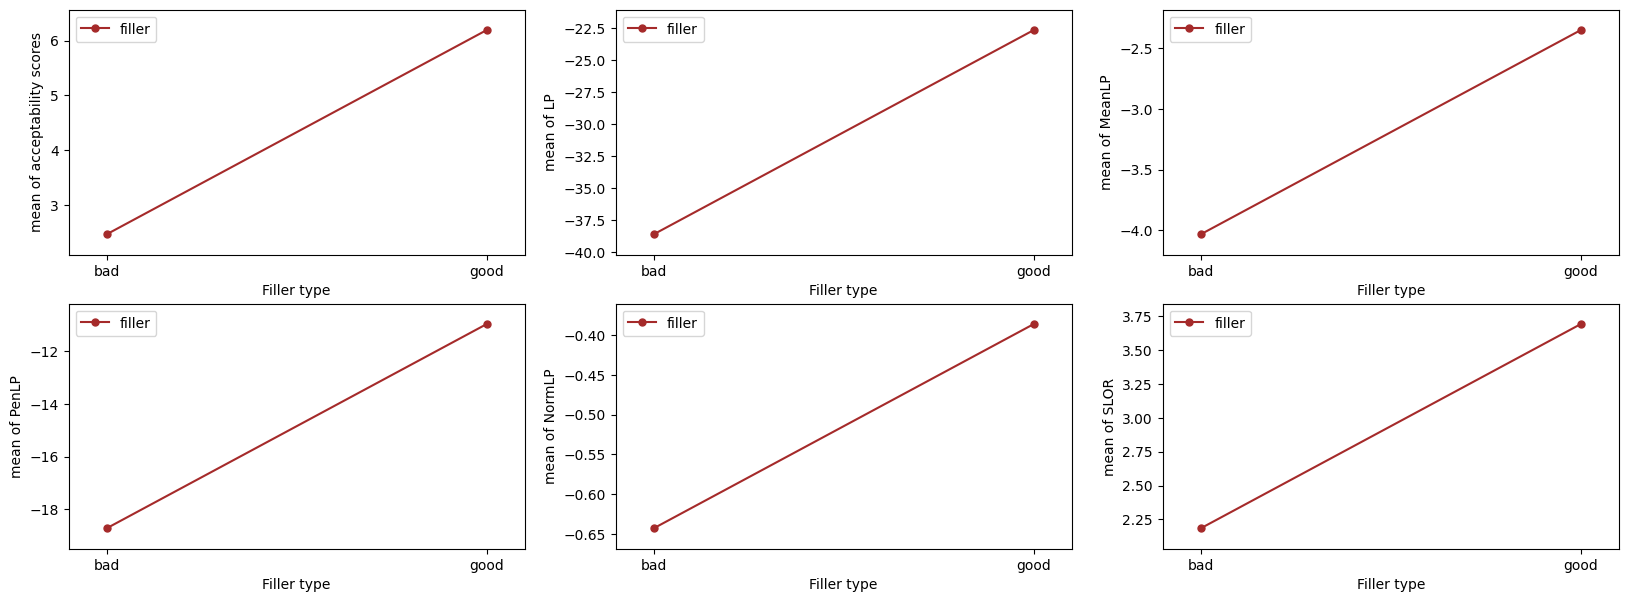

In [ ]:
table1 = table[table["type"]=="filler"]
filler = pd.Series(table1["filler_type"], name="Filler type")
types = pd.Series(table1["type"], name="")
response = pd.Series(table["response"], name="acceptability scores")
lp = pd.Series(table["lp"], name="LP")
meanlp = pd.Series(table["meanlp"], name="MeanLP")
penlp = pd.Series(table["penlp"], name="PenLP")
normlp = pd.Series(table["normlp"], name="NormLP")
slor = pd.Series(table["slor"], name="SLOR")

fig, axs = plt.subplots(2,3,figsize=(20,7))
axs[0,0] = interaction_plot(
    x=filler,
    trace=types,
    response=response,
    colors=["brown"],
    ms=10,
    ax=axs[0,0]
)
axs[0,1] = interaction_plot(
    x=filler,
    trace=types,
    response=lp,
    colors=["brown"],
    ms=10,
    ax=axs[0,1],
)
axs[0,2] = interaction_plot(
    x=filler,
    trace=types,
    response=meanlp,
    colors=["brown"],
    ms=10,
    ax=axs[0,2],
)
axs[1,0] = interaction_plot(
    x=filler,
    trace=types,
    response=penlp,
    colors=["brown"],
    ms=10,
    ax=axs[1,0],
)
axs[1,1] = interaction_plot(
    x=filler,
    trace=types,
    response=normlp,
    colors=["brown"],
    ms=10,
    ax=axs[1,1],
)
axs[1,2] = interaction_plot(
    x=filler,
    trace=types,
    response=slor,
    colors=["brown"],
    ms=10,
    ax=axs[1,2],
)
plt.savefig('fillers.png')

## Порядок слов

In [ ]:
import pandas as pd
table = pd.read_csv('pred_agr_coord_bert_metrics.csv', sep=';')
table

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

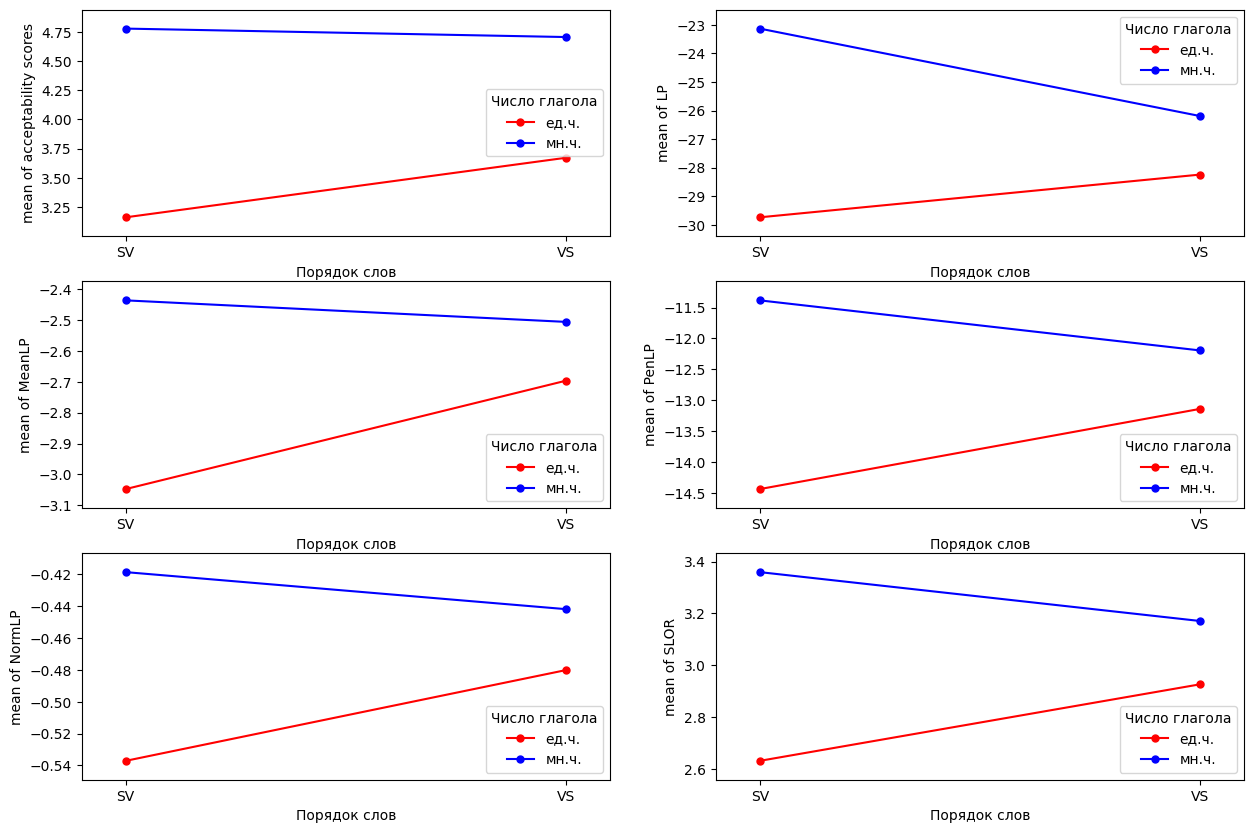

In [ ]:
position = pd.Series(table["position"], name="Порядок слов")
number = pd.Series(table["number"], name="Число глагола")
response = pd.Series(table["response"], name="acceptability scores")
lp = pd.Series(table["lp"], name="LP")
meanlp = pd.Series(table["meanlp"], name="MeanLP")
penlp = pd.Series(table["penlp"], name="PenLP")
normlp = pd.Series(table["normlp"], name="NormLP")
slor = pd.Series(table["slor"], name="SLOR")

fig, axs = plt.subplots(3,2,figsize=(15,10))
axs[0,0] = interaction_plot(
    x=position,
    trace=number,
    response=response,
    colors=["red", "blue"],
    ms=10,
    ax=axs[0,0]
)
axs[0,1] = interaction_plot(
    x=position,
    trace=number,
    response=lp,
    colors=["red", "blue"],
    ms=10,
    ax=axs[0,1],
)
axs[1,0] = interaction_plot(
    x=position,
    trace=number,
    response=meanlp,
    colors=["red", "blue"],
    ms=10,
    ax=axs[1,0],
)
axs[1,1] = interaction_plot(
    x=position,
    trace=number,
    response=penlp,
    colors=["red", "blue"],
    ms=10,
    ax=axs[1,1],
)
axs[2,0] = interaction_plot(
    x=position,
    trace=number,
    response=normlp,
    colors=["red", "blue"],
    ms=10,
    ax=axs[2,0],
)
axs[2,1] = interaction_plot(
    x=position,
    trace=number,
    response=slor,
    colors=["red", "blue"],
    ms=10,
    ax=axs[2,1],
)

plt.savefig('number_position.png')

## Совпадение рода

In [ ]:
import pandas as pd
table = pd.read_csv('pred_agr_coord_bert_metrics.csv', sep=';')
table

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

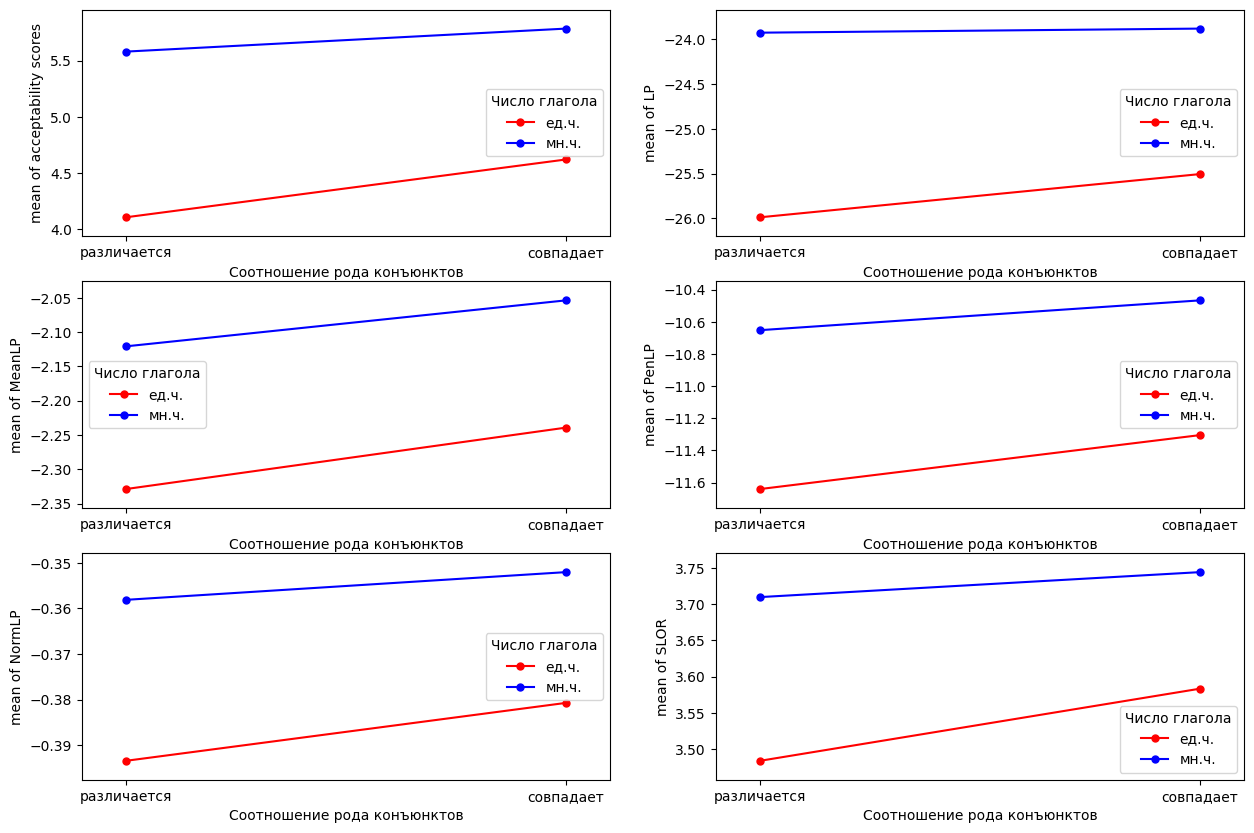

In [ ]:
gender = pd.Series(table["gender"], name="Соотношение рода конъюнктов")
number = pd.Series(table["number"], name="Число глагола")
response = pd.Series(table["response"], name="acceptability scores")
lp = pd.Series(table["lp"], name="LP")
meanlp = pd.Series(table["meanlp"], name="MeanLP")
penlp = pd.Series(table["penlp"], name="PenLP")
normlp = pd.Series(table["normlp"], name="NormLP")
slor = pd.Series(table["slor"], name="SLOR")

fig, axs = plt.subplots(3,2,figsize=(15,10))
axs[0,0] = interaction_plot(
    x=gender,
    trace=number,
    response=response,
    colors=["red", "blue"],
    ms=10,
    ax=axs[0,0]
)
axs[0,1] = interaction_plot(
    x=gender,
    trace=number,
    response=lp,
    colors=["red", "blue"],
    ms=10,
    ax=axs[0,1],
)
axs[1,0] = interaction_plot(
    x=gender,
    trace=number,
    response=meanlp,
    colors=["red", "blue"],
    ms=10,
    ax=axs[1,0],
)
axs[1,1] = interaction_plot(
    x=gender,
    trace=number,
    response=penlp,
    colors=["red", "blue"],
    ms=10,
    ax=axs[1,1],
)
axs[2,0] = interaction_plot(
    x=gender,
    trace=number,
    response=normlp,
    colors=["red", "blue"],
    ms=10,
    ax=axs[2,0],
)
axs[2,1] = interaction_plot(
    x=gender,
    trace=number,
    response=slor,
    colors=["red", "blue"],
    ms=10,
    ax=axs[2,1],
)
plt.savefig('number_gender.png')

## Одушевленность

In [ ]:
import pandas as pd
table = pd.read_csv('pred_agr_coord_bert_metrics.csv', sep=';')
table

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

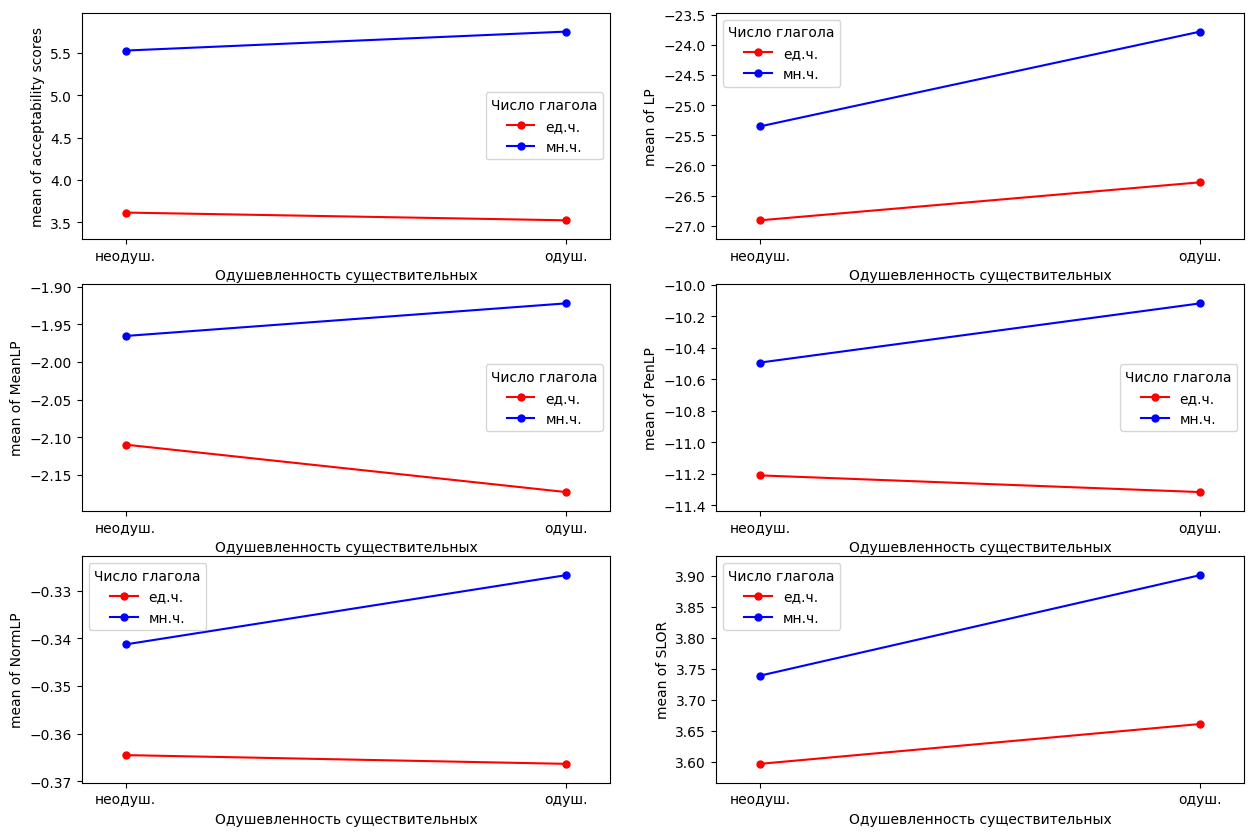

In [ ]:
animacy = pd.Series(table["animacy"], name="Одушевленность существительных")
number = pd.Series(table["number"], name="Число глагола")
response = pd.Series(table["response"], name="acceptability scores")
lp = pd.Series(table["lp"], name="LP")
meanlp = pd.Series(table["meanlp"], name="MeanLP")
penlp = pd.Series(table["penlp"], name="PenLP")
normlp = pd.Series(table["normlp"], name="NormLP")
slor = pd.Series(table["slor"], name="SLOR")

fig, axs = plt.subplots(3,2,figsize=(15,10))
axs[0,0] = interaction_plot(
    x=animacy,
    trace=number,
    response=response,
    colors=["red", "blue"],
    ms=10,
    ax=axs[0,0]
)
axs[0,1] = interaction_plot(
    x=animacy,
    trace=number,
    response=lp,
    colors=["red", "blue"],
    ms=10,
    ax=axs[0,1],
)
axs[1,0] = interaction_plot(
    x=animacy,
    trace=number,
    response=meanlp,
    colors=["red", "blue"],
    ms=10,
    ax=axs[1,0],
)
axs[1,1] = interaction_plot(
    x=animacy,
    trace=number,
    response=penlp,
    colors=["red", "blue"],
    ms=10,
    ax=axs[1,1],
)
axs[2,0] = interaction_plot(
    x=animacy,
    trace=number,
    response=normlp,
    colors=["red", "blue"],
    ms=10,
    ax=axs[2,0],
)
axs[2,1] = interaction_plot(
    x=animacy,
    trace=number,
    response=slor,
    colors=["red", "blue"],
    ms=10,
    ax=axs[2,1],
)
plt.savefig('animacy.png')

## Симметричность

In [ ]:
import pandas as pd
table = pd.read_csv('pred_agr_coord_bert_metrics.csv', sep=';')
table

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

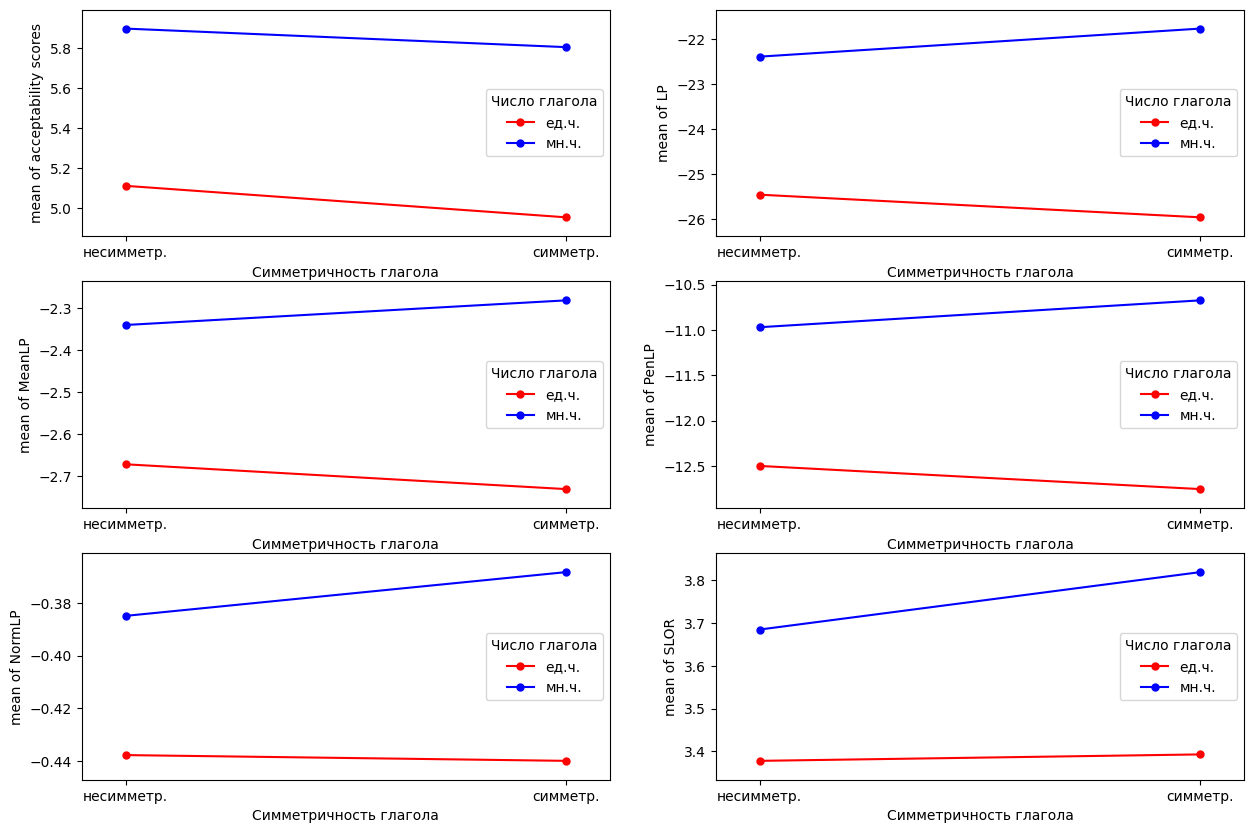

In [ ]:
symmetry = pd.Series(table["symmetry"], name="Симметричность глагола")
number = pd.Series(table["number"], name="Число глагола")
response = pd.Series(table["response"], name="acceptability scores")
lp = pd.Series(table["lp"], name="LP")
meanlp = pd.Series(table["meanlp"], name="MeanLP")
penlp = pd.Series(table["penlp"], name="PenLP")
normlp = pd.Series(table["normlp"], name="NormLP")
slor = pd.Series(table["slor"], name="SLOR")

fig, axs = plt.subplots(3,2,figsize=(15,10))
axs[0,0] = interaction_plot(
    x=symmetry,
    trace=number,
    response=response,
    colors=["red", "blue"],
    ms=10,
    ax=axs[0,0]
)
axs[0,1] = interaction_plot(
    x=symmetry,
    trace=number,
    response=lp,
    colors=["red", "blue"],
    ms=10,
    ax=axs[0,1],
)
axs[1,0] = interaction_plot(
    x=symmetry,
    trace=number,
    response=meanlp,
    colors=["red", "blue"],
    ms=10,
    ax=axs[1,0],
)
axs[1,1] = interaction_plot(
    x=symmetry,
    trace=number,
    response=penlp,
    colors=["red", "blue"],
    ms=10,
    ax=axs[1,1],
)
axs[2,0] = interaction_plot(
    x=symmetry,
    trace=number,
    response=normlp,
    colors=["red", "blue"],
    ms=10,
    ax=axs[2,0],
)
axs[2,1] = interaction_plot(
    x=symmetry,
    trace=number,
    response=slor,
    colors=["red", "blue"],
    ms=10,
    ax=axs[2,1],
)
plt.savefig('symmetry.png')

## Местоимения SV

In [ ]:
import pandas as pd
table = pd.read_csv('you_i_SV_.csv', sep=';')
table

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

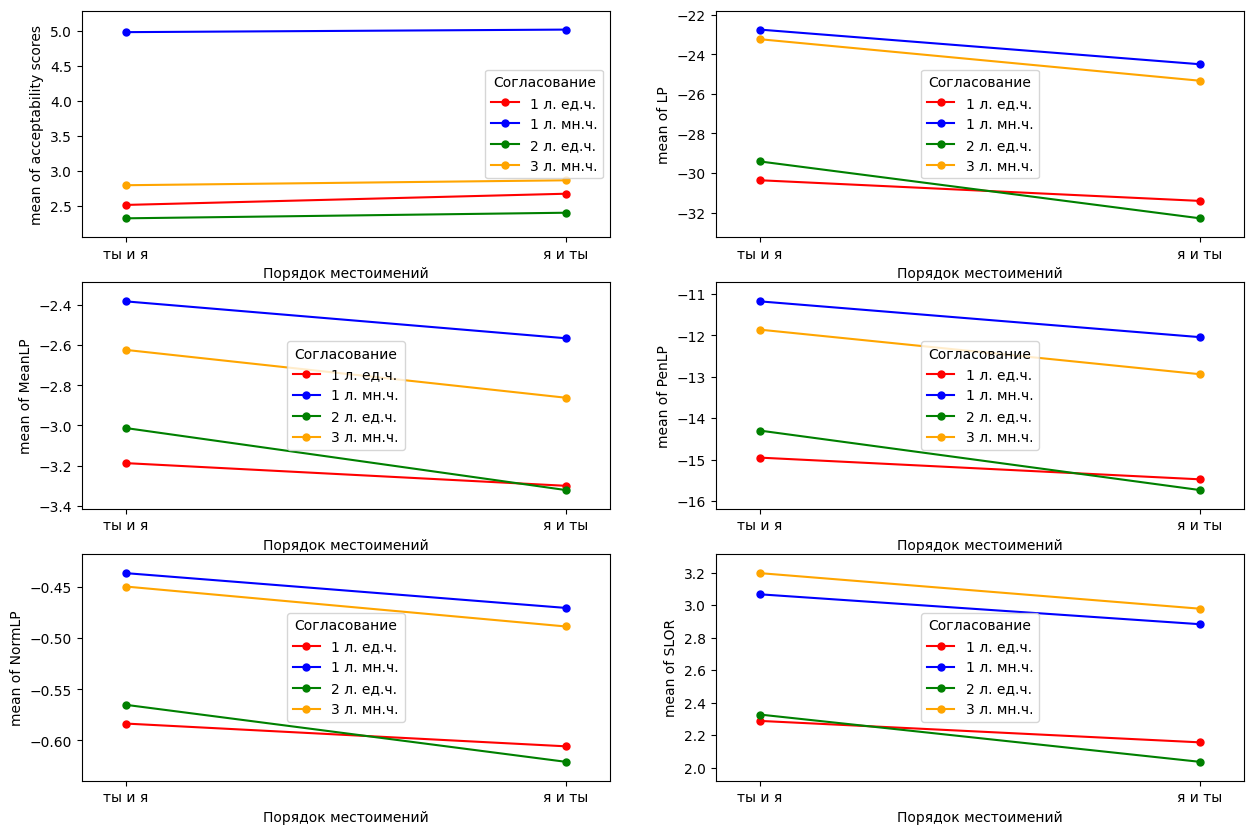

In [ ]:
agreement = pd.Series(table["agreement"], name="Согласование")
subject = pd.Series(table["subject"], name="Порядок местоимений")
response = pd.Series(table["response"], name="acceptability scores")
lp = pd.Series(table["lp"], name="LP")
meanlp = pd.Series(table["meanlp"], name="MeanLP")
penlp = pd.Series(table["penlp"], name="PenLP")
normlp = pd.Series(table["normlp"], name="NormLP")
slor = pd.Series(table["slor"], name="SLOR")

fig, axs = plt.subplots(3,2,figsize=(15,10))
axs[0,0] = interaction_plot(
    x=subject,
    trace=agreement,
    response=response,
    colors=["red", "blue","green","orange"],
    ms=10,
    ax=axs[0,0]
)
axs[0,1] = interaction_plot(
    x=subject,
    trace=agreement,
    response=lp,
    colors=["red", "blue","green","orange"],
    ms=10,
    ax=axs[0,1],
)
axs[1,0] = interaction_plot(
    x=subject,
    trace=agreement,
    response=meanlp,
    colors=["red", "blue","green","orange"],
    ms=10,
    ax=axs[1,0],
)
axs[1,1] = interaction_plot(
    x=subject,
    trace=agreement,
    response=penlp,
    colors=["red", "blue","green","orange"],
    ms=10,
    ax=axs[1,1],
)
axs[2,0] = interaction_plot(
    x=subject,
    trace=agreement,
    response=normlp,
    colors=["red", "blue","green","orange"],
    ms=10,
    ax=axs[2,0],
)
axs[2,1] = interaction_plot(
    x=subject,
    trace=agreement,
    response=slor,
    colors=["red", "blue","green","orange"],
    ms=10,
    ax=axs[2,1],
)
plt.savefig('you_i_SV.png')

## Местоимения VS

In [ ]:
import pandas as pd
table = pd.read_csv('you_i_VS_.csv', sep=';')

table

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

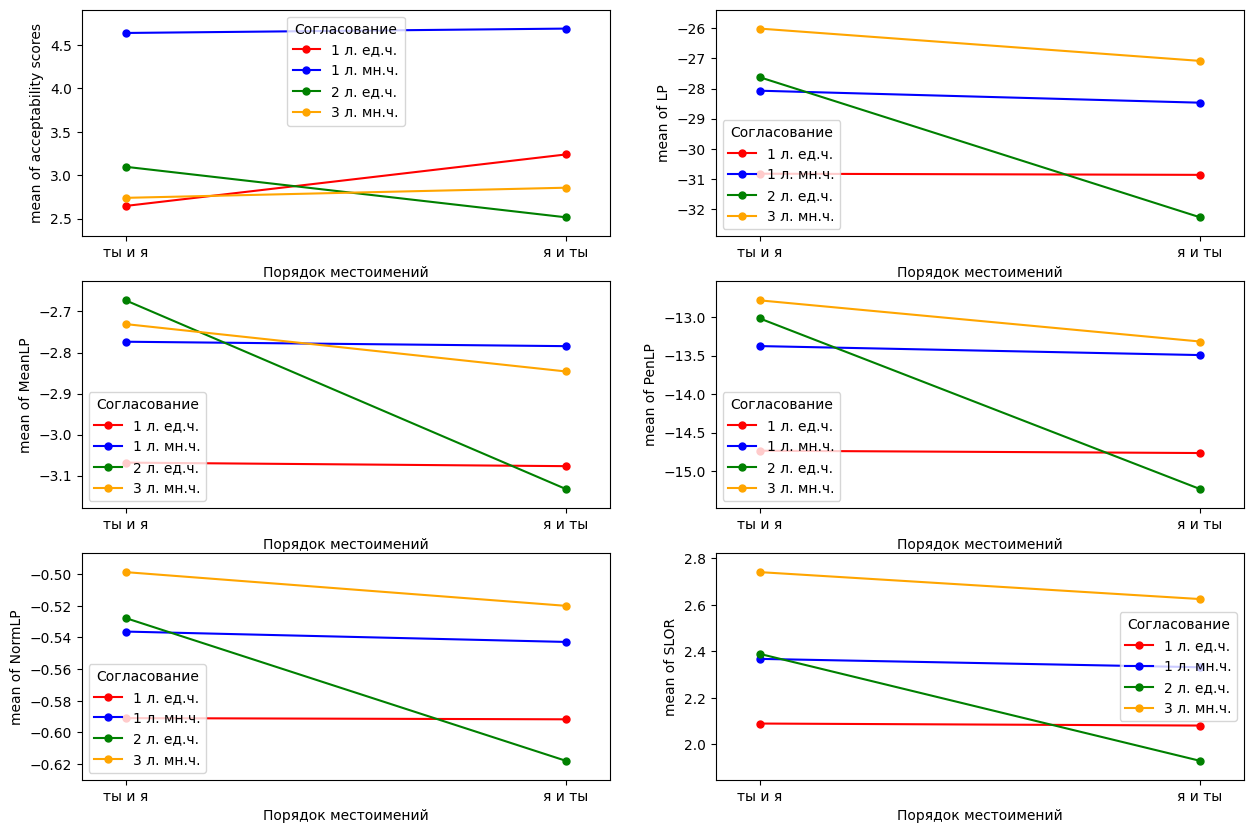

In [ ]:
agreement = pd.Series(table["agreement"], name="Согласование")
subject = pd.Series(table["subject"], name="Порядок местоимений")
response = pd.Series(table["response"], name="acceptability scores")
lp = pd.Series(table["lp"], name="LP")
meanlp = pd.Series(table["meanlp"], name="MeanLP")
penlp = pd.Series(table["penlp"], name="PenLP")
normlp = pd.Series(table["normlp"], name="NormLP")
slor = pd.Series(table["slor"], name="SLOR")

fig, axs = plt.subplots(3,2,figsize=(15,10))
axs[0,0] = interaction_plot(
    x=subject,
    trace=agreement,
    response=response,
    colors=["red", "blue","green","orange"],
    ms=10,
    ax=axs[0,0]
)
axs[0,1] = interaction_plot(
    x=subject,
    trace=agreement,
    response=lp,
    colors=["red", "blue","green","orange"],
    ms=10,
    ax=axs[0,1],
)
axs[1,0] = interaction_plot(
    x=subject,
    trace=agreement,
    response=meanlp,
    colors=["red", "blue","green","orange"],
    ms=10,
    ax=axs[1,0],
)
axs[1,1] = interaction_plot(
    x=subject,
    trace=agreement,
    response=penlp,
    colors=["red", "blue","green","orange"],
    ms=10,
    ax=axs[1,1],
)
axs[2,0] = interaction_plot(
    x=subject,
    trace=agreement,
    response=normlp,
    colors=["red", "blue","green","orange"],
    ms=10,
    ax=axs[2,0],
)
axs[2,1] = interaction_plot(
    x=subject,
    trace=agreement,
    response=slor,
    colors=["red", "blue","green","orange"],
    ms=10,
    ax=axs[2,1],
)
plt.savefig('you_i_VS.png')

## Я и Х VS

In [ ]:
import pandas as pd
table = pd.read_csv('noun_i.csv', sep=';')
table

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

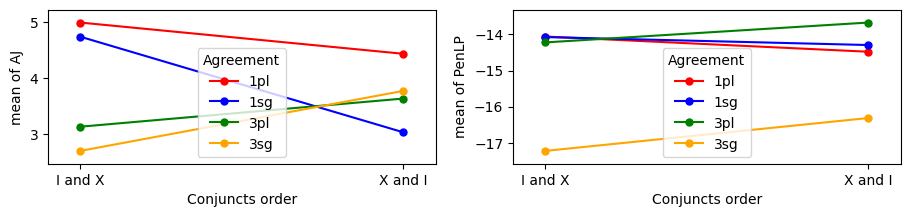

In [ ]:
agreement = pd.Series(table["agreement"], name="Agreement")
subject = pd.Series(table["subject"], name="Conjuncts order")
response = pd.Series(table["response"], name="AJ")
penlp = pd.Series(table["penlp"], name="PenLP")

fig, axs = plt.subplots(1,2,figsize=(11,2))
axs[0] = interaction_plot(
    x=subject,
    trace=agreement,
    response=response,
    colors=["red", "blue","green","orange"],
    ms=10,
    ax=axs[0]
)
axs[1] = interaction_plot(
    x=subject,
    trace=agreement,
    response=penlp,
    colors=["red", "blue","green","orange"],
    ms=10,
    ax=axs[1],
)

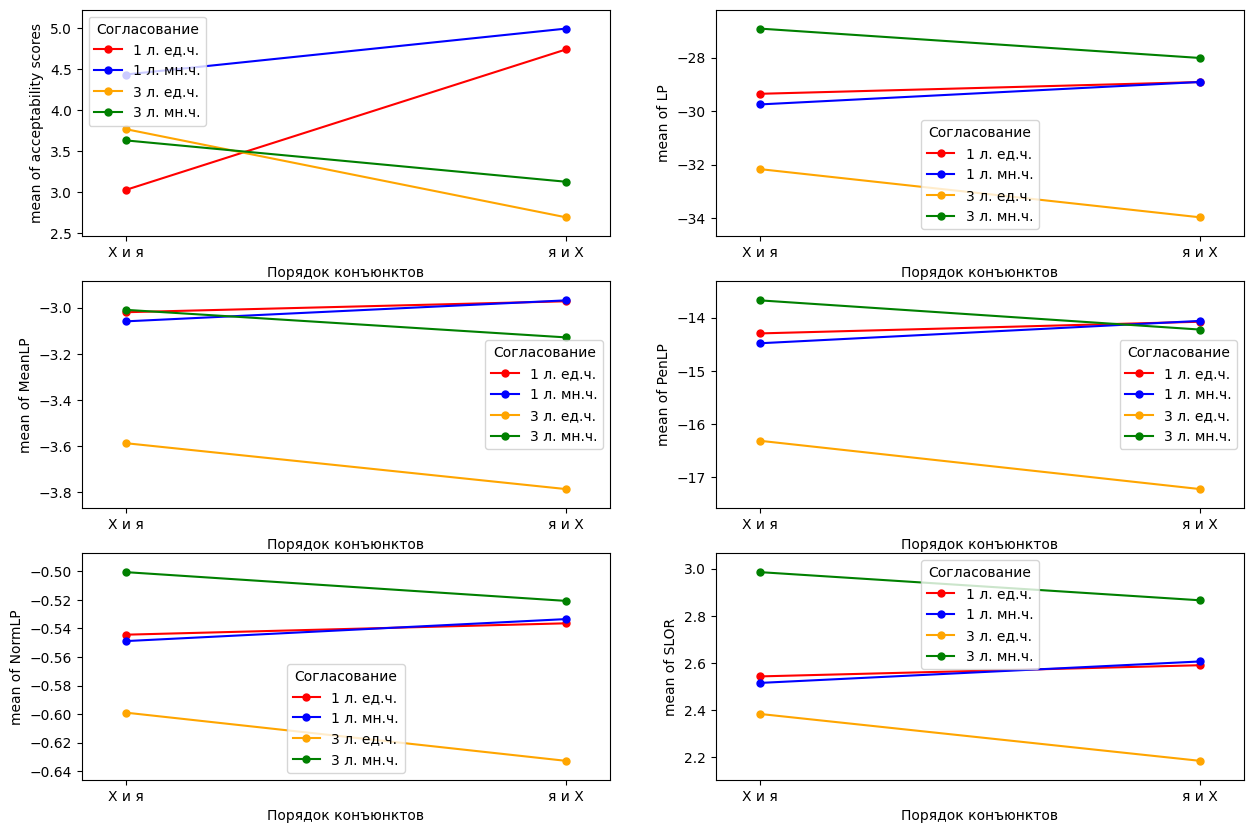

In [ ]:
agreement = pd.Series(table["agreement"], name="Согласование")
subject = pd.Series(table["subject"], name="Порядок конъюнктов")
response = pd.Series(table["response"], name="acceptability scores")
lp = pd.Series(table["lp"], name="LP")
meanlp = pd.Series(table["meanlp"], name="MeanLP")
penlp = pd.Series(table["penlp"], name="PenLP")
normlp = pd.Series(table["normlp"], name="NormLP")
slor = pd.Series(table["slor"], name="SLOR")

fig, axs = plt.subplots(3,2,figsize=(15,10))
axs[0,0] = interaction_plot(
    x=subject,
    trace=agreement,
    response=response,
    colors=["red", "blue","orange","green"],
    ms=10,
    ax=axs[0,0]
)
axs[0,1] = interaction_plot(
    x=subject,
    trace=agreement,
    response=lp,
    colors=["red", "blue","orange","green"],
    ms=10,
    ax=axs[0,1],
)
axs[1,0] = interaction_plot(
    x=subject,
    trace=agreement,
    response=meanlp,
    colors=["red", "blue","orange","green"],
    ms=10,
    ax=axs[1,0],
)
axs[1,1] = interaction_plot(
    x=subject,
    trace=agreement,
    response=penlp,
    colors=["red", "blue","orange","green"],
    ms=10,
    ax=axs[1,1],
)
axs[2,0] = interaction_plot(
    x=subject,
    trace=agreement,
    response=normlp,
    colors=["red", "blue","orange","green"],
    ms=10,
    ax=axs[2,0],
)
axs[2,1] = interaction_plot(
    x=subject,
    trace=agreement,
    response=slor,
    colors=["red", "blue","orange","green"],
    ms=10,
    ax=axs[2,1],
)
plt.savefig('noun_i.png')